<a href="https://colab.research.google.com/github/shreyasbhojane10/Artificial-Intelligence/blob/main/Facebook_Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a function to generate seasonal data
def generate_seasonal_data(start_date, period, seasonality_factor):
    data = pd.DataFrame({
        "ds": pd.date_range(start_date, periods=period, freq="D")
    })
    data["y"] = np.sin(2 * np.pi * data["ds"].dt.dayofyear / 365) * seasonality_factor     # This creates a smooth sine wave across the year → mimicking yearly seasonality.
    return data

#prophet model needs column names ds for dates and y for years

Here above "ds" is date time,"D" is date, "Y" is year - columns in data sets

In [4]:
# Generate data with a yearly seasonality pattern
data = generate_seasonal_data("2020-01-01", 365, 10)  # 1 year of data with seasonality factor of 10

In [5]:
data

,ds,y
0,2020-01-01,1.721336e-01
1,2020-01-02,3.442161e-01
2,2020-01-03,5.161967e-01
3,2020-01-04,6.880243e-01
4,2020-01-05,8.596480e-01
...,...,...
360,2020-12-26,-6.880243e-01
361,2020-12-27,-5.161967e-01
362,2020-12-28,-3.442161e-01
363,2020-12-29,-1.721336e-01


In [6]:
# Forecast for the next 2 years (730 days)
future = data.copy()
future["ds"] = future["ds"] + pd.DateOffset(days=730)  # Extend data for forecasting

In [7]:
future

,ds,y
0,2021-12-31,1.721336e-01
1,2022-01-01,3.442161e-01
2,2022-01-02,5.161967e-01
3,2022-01-03,6.880243e-01
4,2022-01-04,8.596480e-01
...,...,...
360,2022-12-26,-6.880243e-01
361,2022-12-27,-5.161967e-01
362,2022-12-28,-3.442161e-01
363,2022-12-29,-1.721336e-01


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uh2n9c4/dger5ipv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uh2n9c4/8f2s021y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45236', 'data', 'file=/tmp/tmp1uh2n9c4/dger5ipv.json', 'init=/tmp/tmp1uh2n9c4/8f2s021y.json', 'output', 'file=/tmp/tmp1uh2n9c4/prophet_modelxme01us7/prophet_model-20250909050044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:00:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:00:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


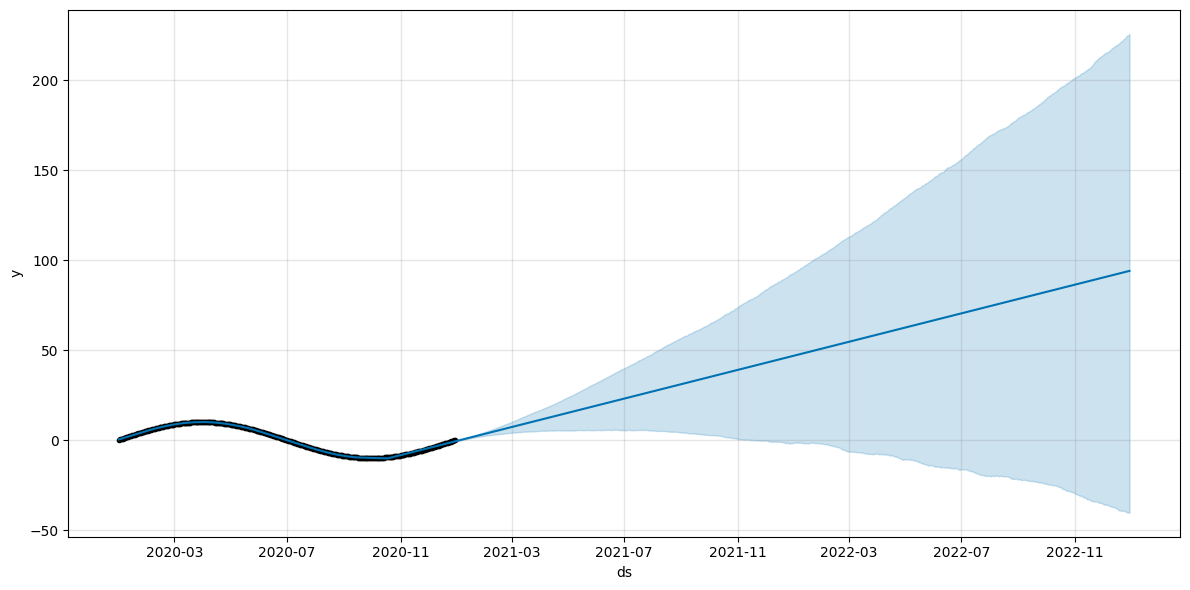

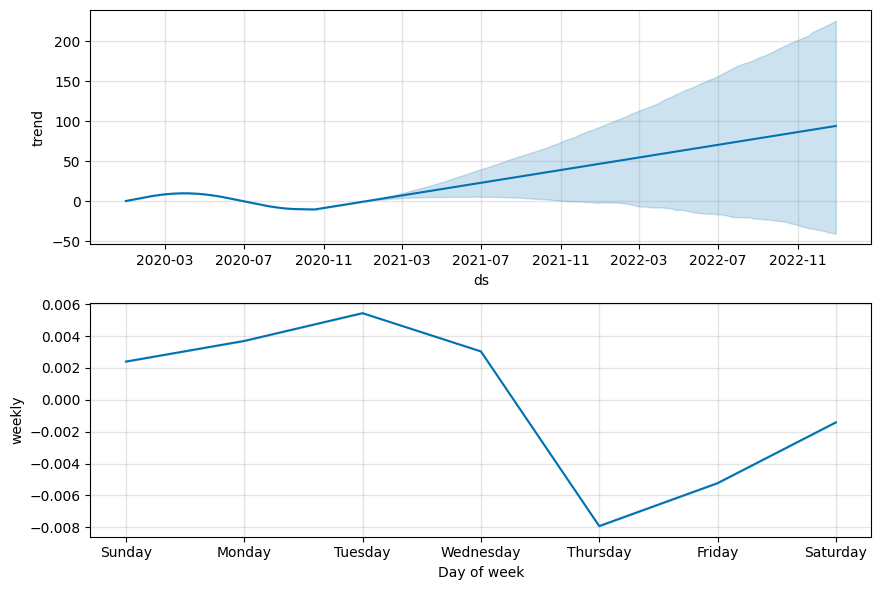

In [8]:
# Create and fit the Prophet model
model = Prophet()
model.fit(data)

# Make the forecast
forecast = model.make_future_dataframe(periods=730)  # Forecast for 2 years
forecast = model.predict(forecast)

# Plot the actual data and forecast
model.plot(forecast, figsize=(12, 6))
model.plot_components(forecast)  # View separate components of the forecast

# Show the plot
plt.show()

In [9]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.352648,0.135444,0.573648,0.352648,0.352648,0.003040,0.003040,0.003040,0.003040,0.003040,0.003040,0.0,0.0,0.0,0.355688
1,2020-01-02,0.508745,0.269335,0.723393,0.508745,0.508745,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,0.0,0.0,0.0,0.500816
2,2020-01-03,0.664842,0.426305,0.882254,0.664842,0.664842,-0.005233,-0.005233,-0.005233,-0.005233,-0.005233,-0.005233,0.0,0.0,0.0,0.659608
3,2020-01-04,0.820938,0.617625,1.023965,0.820938,0.820938,-0.001416,-0.001416,-0.001416,-0.001416,-0.001416,-0.001416,0.0,0.0,0.0,0.819522
4,2020-01-05,0.977035,0.735785,1.204417,0.977035,0.977035,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.0,0.0,0.0,0.979436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2022-12-26,93.492907,-39.625509,223.808725,-39.919139,223.874932,0.003697,0.003697,0.003697,0.003697,0.003697,0.003697,0.0,0.0,0.0,93.496604
1091,2022-12-27,93.622666,-40.111509,224.621902,-40.215509,224.280583,0.005442,0.005442,0.005442,0.005442,0.005442,0.005442,0.0,0.0,0.0,93.628108
1092,2022-12-28,93.752425,-40.283305,224.853632,-40.342184,224.686233,0.003040,0.003040,0.003040,0.003040,0.003040,0.003040,0.0,0.0,0.0,93.755465
1093,2022-12-29,93.882184,-40.259017,225.004084,-40.329352,225.091883,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,0.0,0.0,0.0,93.874255
